In [1]:
from pathlib import Path
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.data_sources.csv_dataset_repository import CSVDatasetRepository 

# Configure logging
configure_logging(env="dev")

# Get repository root path
root = get_repository_root()

# Load configuration
config_loader = YamlConfigLoader()
paths = config_loader.load_config(f"{root}/configs/paths.yaml")
train_paths = get_repository_root() / Path(paths["data"]["input"]["train_dataset"])

# Initialize Logger
logger = LoguruLogger()

# Load Dataset fron CSV file
csv_repo = CSVDatasetRepository(logger=logger,source_path=train_paths) 

# Lit le fichier CSV et le charge en mémoire (DataFrame Pandas).
data = csv_repo.load_dataset()

# Show the 5 first rows
display(data.head()) # Affiche les 5 premières lignes pour validation.
print(f"le dataset chargé a {data.shape[0]} lignes et {data.shape[1]} colonnes")

2025-12-28 14:34:34 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-28 14:34:34 | INFO     | csv_dataset_repository.py:56 | load_dataset() | Chargement du dataset depuis : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/data/input/train.csv | {}
2025-12-28 14:34:35 | INFO     | csv_dataset_repository.py:63 | load_dataset() | Dataset chargé avec succès (77837 lignes, 31 colonnes). | {}


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,48,92,131,85,104,7.59,5.21,24.6,Type 2,1
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Former,2,345,6.4,...,41,127,186,109,187,12.01,6.75,25.0,Type 2,1
2,22,Other,Other,Postgraduate,Middle,Retired,Never,3,206,5.6,...,41,95,124,112,151,9.69,6.36,16.8,Pre-Diabetes,0
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,41,204,79,113,129,18.75,5.75,40.9,Pre-Diabetes,0
4,58,Female,White,Highschool,Lower-Middle,Unemployed,Never,3,152,4.2,...,46,61,92,101,162,9.11,6.52,28.8,Type 2,1


le dataset chargé a 77837 lignes et 31 colonnes


In [2]:
from health_lifestyle_diabetes.infrastructure.feature_engineering.pipeline_feature_engineering import FeatureEngineeringPipeline

pipeline = FeatureEngineeringPipeline(logger=LoguruLogger())
df_enriched = pipeline.transform(data)

# Affiche les 5 premières lignes du dataset enrichi pour validation.
display(df_enriched.head())
print(f"Le dataset d'entrainement initial avait {data.shape[1]} colonnes")
print(f"Le dataset d'entrainement fianla apres FE a desormais {df_enriched.shape[1]} colonnes")

2025-12-28 14:34:35 | INFO     | pipeline_feature_engineering.py:82 | transform() | Démarrage du pipeline complet de Feature Engineering... | {}
2025-12-28 14:34:35 | INFO     | exclusion.py:36 | drop_leakage_columns() | Vérification des colonnes à risque de data leakage... | {}
2025-12-28 14:34:35 | INFO     | exclusion.py:40 | drop_leakage_columns() | Suppression des colonnes à risque de leakage : ['diabetes_risk_score', 'diabetes_stage'] | {}
2025-12-28 14:34:35 | INFO     | base_preprocessing.py:25 | clean_categorical_variables() | Nettoyage des variables catégorielles... | {}
2025-12-28 14:34:35 | INFO     | base_preprocessing.py:32 | clean_categorical_variables() | Libellés uniformisés avec succès. | {}
2025-12-28 14:34:35 | INFO     | demographics_features.py:82 | transform() | Création des variables démographiques... | {}
2025-12-28 14:34:35 | INFO     | demographics_features.py:68 | _create_age_group() | Utilisation du découpage d'âge en 3 catégories. | {}
2025-12-28 14:34:35 

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,19,1878.5,0,0,1.411765,0.553333,1.136986,1,4,0.784946
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Ex-Smoker,2,345,6.4,...,78,4011.2,1,2,1.859375,2.300000,0.369565,0,6,1.703704
2,22,Unknown,Other,Postgraduate,Middle,Inactive,Never,3,206,5.6,...,39,2844.8,0,1,1.384615,1.373333,0.714286,0,6,1.184615
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,16,3412.6,0,3,2.157143,0.486667,0.913043,1,6,0.945205
4,58,Female,White,Highschool,Lower-Middle,Inactive,Never,3,152,4.2,...,61,2373.5,0,0,1.265957,1.013333,1.291667,0,6,0.699029


Le dataset d'entrainement initial avait 31 colonnes
Le dataset d'entrainement fianla apres FE a desormais 52 colonnes


In [3]:
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.splitters.sklearn_splitter import SklearnDatasetSplitter

# Load configuration
config_loader = YamlConfigLoader()
cfg = config_loader.load_config(f"{get_repository_root()}/configs/splitter.yaml")
print(f"Splitter configuration: {cfg['splitter']}")

logger = LoguruLogger()

splitter = SklearnDatasetSplitter(
    train_size=cfg["splitter"]["train_size"],
    target_column=cfg["splitter"]["target_column"],
    random_state=cfg["splitter"]["random_state"],
    logger=logger,
)
train_df_enriched, valid_df_enriched = splitter.split(df_enriched)
print("Dataset successfully split into training and validation sets.\n")
print(f"Train set shape: {train_df_enriched.shape}")
print(f"Validation set shape: {valid_df_enriched.shape}")

Splitter configuration: {'train_size': 0.8, 'target_column': 'diagnosed_diabetes', 'random_state': 42}
2025-12-28 14:34:38 | DEBUG    | sklearn_splitter.py:37 | __init__() | SklearnDatasetSplitter initialized | {}
2025-12-28 14:34:38 | INFO     | sklearn_splitter.py:42 | split() | Starting dataset split | {}
Dataset successfully split into training and validation sets.
2025-12-28 14:34:38 | INFO     | sklearn_splitter.py:57 | split() | Split done | train=(62269, 52) | test=(15568, 52) | {}

Train set shape: (62269, 52)
Validation set shape: (15568, 52)


In [4]:
from health_lifestyle_diabetes.infrastructure.features_selections import features_selection as fs
print(f"Applying feature selection using {len(fs.SELECTED_FEATURES)} features.")
train_df_enriched = train_df_enriched[fs.SELECTED_FEATURES + [fs.TARGET_COLUMN]]
valid_df_enriched = valid_df_enriched[fs.SELECTED_FEATURES + [fs.TARGET_COLUMN]]
print("Feature selection applied successfully.")    


# Étape 5.1 : Définition de la variable cible
TARGET = cfg["splitter"]["target_column"]

# Étape 5.2 : Création des matrices X (features) et des vecteurs y (target) pour chaque set
# Pour l'entraînement final
X_train = train_df_enriched.drop(columns=[fs.TARGET_COLUMN])
y_train = train_df_enriched[fs.TARGET_COLUMN]

# Pour la validation
X_valid = valid_df_enriched.drop(columns=[fs.TARGET_COLUMN])
y_valid = valid_df_enriched[fs.TARGET_COLUMN]

# Affichage des dimensions des matrices et vecteurs
print("Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :")
print(f"- X_train (Features d'entraînement) : {X_train.shape[0]} lignes, {X_train.shape[1]} colonnes")
print(f"- X_valid (Features de validation)  : {X_valid.shape[0]} lignes, {X_valid.shape[1]} colonnes")

print("\nÉtape 5.4 : Vérification des vecteurs cibles (y) :")
print(f"- y_train : {y_train.shape[0]} lignes")
print(f"- y_valid : {y_valid.shape[0]} lignes")

Applying feature selection using 5 features.
Feature selection applied successfully.
Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :
- X_train (Features d'entraînement) : 62269 lignes, 5 colonnes
- X_valid (Features de validation)  : 15568 lignes, 5 colonnes

Étape 5.4 : Vérification des vecteurs cibles (y) :
- y_train : 62269 lignes
- y_valid : 15568 lignes


2025-12-28 14:34:38 | INFO     | catboost_trainer.py:38 | __init__() | CatBoostTrainer initialisé avec les paramètres fournis. | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:111 | train() | Entraînement CatBoost | train_shape=(62269, 5) | valid_shape=(15568, 5) | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:127 | train() | Détection automatique des variables catégorielles : ['glucose_status'] | {}
2025-12-28 14:34:38 | INFO     | catboost_trainer.py:137 | train() | Démarrage de l'entraînement CatBoost. | {}
0:	learn: 0.6151952	test: 0.6147053	best: 0.6147053 (0)	total: 90.2ms	remaining: 2m 15s
100:	learn: 0.2130868	test: 0.2076083	best: 0.2076083 (100)	total: 3.48s	remaining: 48.2s
200:	learn: 0.2118468	test: 0.2075459	best: 0.2075059 (154)	total: 5.79s	remaining: 37.4s
300:	learn: 0.2099494	test: 0.2078465	best: 0.2075059 (154)	total: 8.37s	remaining: 33.3s
400:	learn: 0.2081927	test: 0.2081881	best: 0.2075059 (154)	total: 11s	remaining: 30.1s
500:	learn: 0.20672

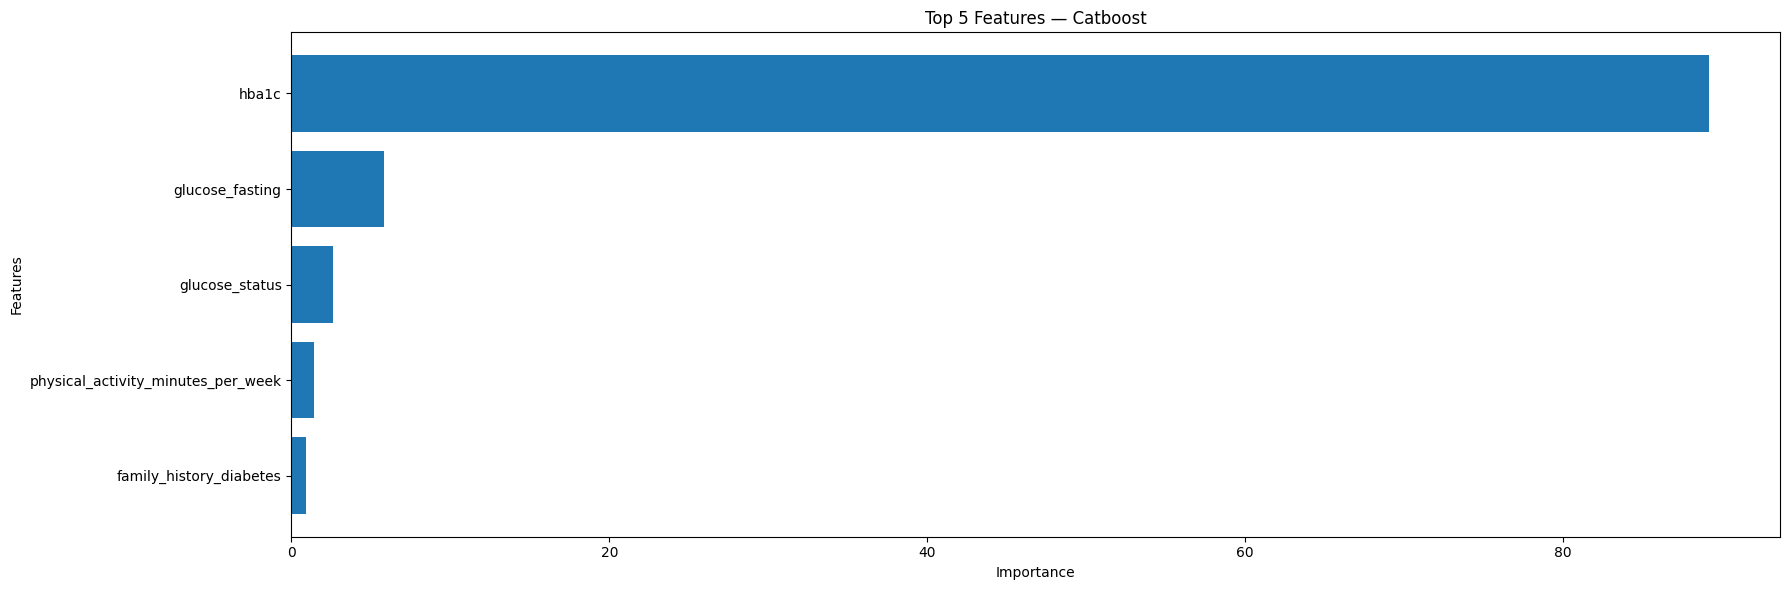

2025-12-28 14:35:18 | INFO     | feature_importance_plotter.py:57 | plot() | Affichage du barplot des feature importances terminé | {}


In [5]:
from health_lifestyle_diabetes.infrastructure.feature_importance.boosting_feature_importance_adapter import BoostingFeatureImportanceAdapter
from health_lifestyle_diabetes.infrastructure.visualization.feature_importance_plotter import FeatureImportancePlotter
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)
from health_lifestyle_diabetes.infrastructure.features_selections import features_selection as fs

logger = LoguruLogger()
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 1500,
    "learning_rate": 0.05,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "Logloss",  #"AUC"
    "verbose": 100,   # ← test du verbose
}


trainer = CatBoostTrainer(params=catboost_params,logger=logger)
model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)

# 1) Extraction
extractor = BoostingFeatureImportanceAdapter()
importances = extractor.get_feature_importances(model)  # model = CatBoost/XGB/LGBM déjà entraîné

# 2) Plot
plotter = FeatureImportancePlotter(logger)
plotter.plot(
    importances=importances,
    top_n=5,
    model_name="Catboost",
    save_plot=True,
)

In [1]:
from health_lifestyle_diabetes.infrastructure.features_selections import features_selection as fs

print("Features disponibles pour l'entraînement :")
print(len(fs.SELECTED_FEATURES))

print(len(fs.FEATURES_ALL))

print(f"Target column: {fs.TARGET_COLUMN}")

print()

Features disponibles pour l'entraînement :
5
51
Target column: diagnosed_diabetes



In [7]:
from pandas import DataFrame


def summarize_dataset(df: DataFrame, max_examples: int = 5) -> DataFrame:
    """
    Fournit une synthèse détaillée du dataset :
    - Nom de colonne
    - Type de données
    - Nombre et pourcentage de valeurs manquantes
    - Cardinalité (nombre de valeurs uniques)
    - Exemples représentatifs

    Args:
        df (pd.DataFrame): Le DataFrame à analyser.
        max_examples (int): Nombre maximum d'exemples à afficher par colonne.

    Returns:
        pd.DataFrame: Tableau récapitulatif des colonnes et de leurs caractéristiques.
    """
    logger = LoguruLogger()

    if df is None or df.empty:
        logger.warning("Aucun dataset fourni ou dataset vide.")
        return DataFrame(columns=["Column", "Type", "Missing", "% Missing", "Cardinality", "Examples"])

    logger.info("Résumé détaillé du dataset en cours d'analyse...")
    total_rows = len(df)
    column_details = []

    for col in df.columns:
        col_type = df[col].dtype

        # Valeurs manquantes
        missing_count = df[col].isna().sum()
        missing_pct = round((missing_count / total_rows) * 100, 2)

        # Cardinalité
        cardinality = df[col].nunique(dropna=True)

        # Exemples représentatifs
        unique_values = df[col].dropna().unique()
        if df[col].dtype == "object" or df[col].dtype.name == "category":
            examples = unique_values[:max_examples]
        else:
            examples = sorted(unique_values[:max_examples])

        column_details.append([
            col,
            col_type,
            missing_count,
            missing_pct,
            cardinality,
            examples
        ])

    # Création du DataFrame récapitulatif
    summary_df = DataFrame(
        column_details,
        columns=["Column", "Type", "Missing", "% Missing", "Cardinality", "Examples"]
    ).sort_values(by="% Missing", ascending=False)

    # Logs synthétiques
    logger.info(f"Résumé terminé : {len(summary_df)} colonnes, {total_rows} lignes.")
    #logger.debug(
    #    f"Colonnes les plus incomplètes :\n%s",
    #    summary_df[["Column", "Missing", "% Missing"]].head(10)
    #)

    return summary_df




print("Affichage des 5 premières lignes du dataset d'entraînement enrichi :")
# display(train_df_enriched.head())
display(train_df_enriched.describe())

# En supposant que 'data' est votre DataFrame
display(train_df_enriched.dtypes)
summarize_data = summarize_dataset(train_df_enriched, 3)

display(summarize_data)

Affichage des 5 premières lignes du dataset d'entraînement enrichi :


,Age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
count,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,...,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000,62269.000000
mean,50.177649,2.010952,118.983812,5.994114,6.995262,6.006578,0.219114,0.251136,0.079638,25.619260,...,48.824022,2854.491118,0.314779,1.171225,1.556199,0.791294,0.880733,0.361946,5.111661,1.105713
std,15.501265,1.423114,84.220690,1.782685,1.092765,2.467727,0.413649,0.433670,0.270735,3.587993,...,25.475418,571.276878,0.464432,0.988665,0.242150,0.552315,0.395077,0.480567,2.162434,0.425087
min,19.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,-43.000000,1067.600000,0.000000,0.000000,0.900000,0.000000,0.050000,0.000000,0.000000,0.251908
25%,38.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,32.000000,2455.200000,0.000000,0.000000,1.384615,0.380000,0.608108,0.000000,4.000000,0.784810
50%,51.000000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,49.000000,2824.800000,0.000000,1.000000,1.537500,0.666667,0.857143,0.000000,6.000000,1.000000
75%,61.000000,3.000000,161.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,66.000000,3225.600000,1.000000,2.000000,1.707692,1.073333,1.123596,1.000000,6.000000,1.338983
max,90.000000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,153.000000,5715.500000,1.000000,5.000000,2.887097,3.000000,3.666667,1.000000,10.000000,2.000000


Age                                      int64
gender                                  object
ethnicity                               object
education_level                         object
income_level                            object
employment_status                       object
smoking_status                          object
alcohol_consumption_per_week             int64
physical_activity_minutes_per_week       int64
diet_score                             float64
sleep_hours_per_day                    float64
screen_time_hours_per_day              float64
family_history_diabetes                  int64
hypertension_history                     int64
cardiovascular_history                   int64
bmi                                    float64
waist_to_hip_ratio                     float64
systolic_bp                              int64
diastolic_bp                             int64
heart_rate                               int64
cholesterol_total                        int64
hdl_cholester

2025-12-28 13:07:45 | INFO     | 3678652799.py:26 | summarize_dataset() | Résumé détaillé du dataset en cours d'analyse... | {}
2025-12-28 13:07:45 | INFO     | 3678652799.py:63 | summarize_dataset() | Résumé terminé : 52 colonnes, 62269 lignes. | {}


,Column,Type,Missing,% Missing,Cardinality,Examples
0,Age,int64,0,0.0,70,"[44, 55, 61]"
1,gender,object,0,0.0,3,"[Female, Male, Unknown]"
28,diagnosed_diabetes,int64,0,0.0,2,"[0, 1]"
29,age_group,category,0,0.0,3,"['Adulte', 'Senior', 'Jeune'] Categories (3, o..."
30,age_squared,int64,0,0.0,70,"[1936, 3025, 3721]"
31,socioeconomic_vulnerability_flag,int64,0,0.0,2,"[0, 1]"
32,glucose_status,category,0,0.0,3,"['Pre-Diabetes', 'Diabetes', 'Normal'] Categor..."
33,hba1c_category,category,0,0.0,3,"['Diabetes', 'Pre-Diabetes', 'Normal'] Categor..."
34,HOMA_IR,float64,0,0.0,34801,"[1.4525925925925924, 1.7925925925925925, 4.719..."
35,insulin_resistance_flag,int64,0,0.0,2,"[0, 1]"


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from typing import Any, Dict

# Load dataset pour l'exemple
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    eval_metric="logloss",
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, pred_xgb)
print("AUC XGBoost:", auc_xgb)


from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1
)
lgb_model.fit(X_train, y_train)
pred_lgb = lgb_model.predict_proba(X_test)[:, 1]
auc_lgb = roc_auc_score(y_test, pred_lgb)
print("AUC LightGBM:", auc_lgb)

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=4,
    verbose=False
)
cat_model.fit(X_train, y_train)
pred_cat = cat_model.predict_proba(X_test)[:, 1]
auc_cat = roc_auc_score(y_test, pred_cat)
print("AUC CatBoost:", auc_cat)


/Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:32:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC XGBoost: 0.9931215198165738
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AUC CatBoost: 0.9967245332459875


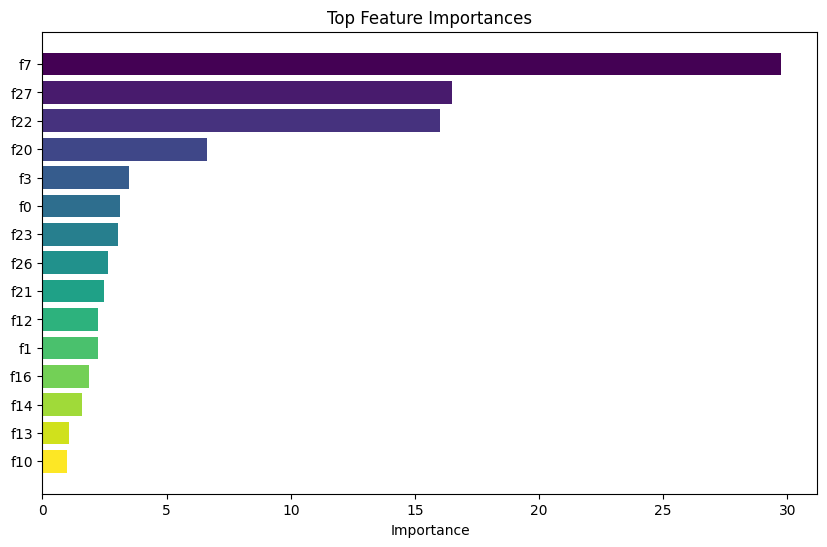

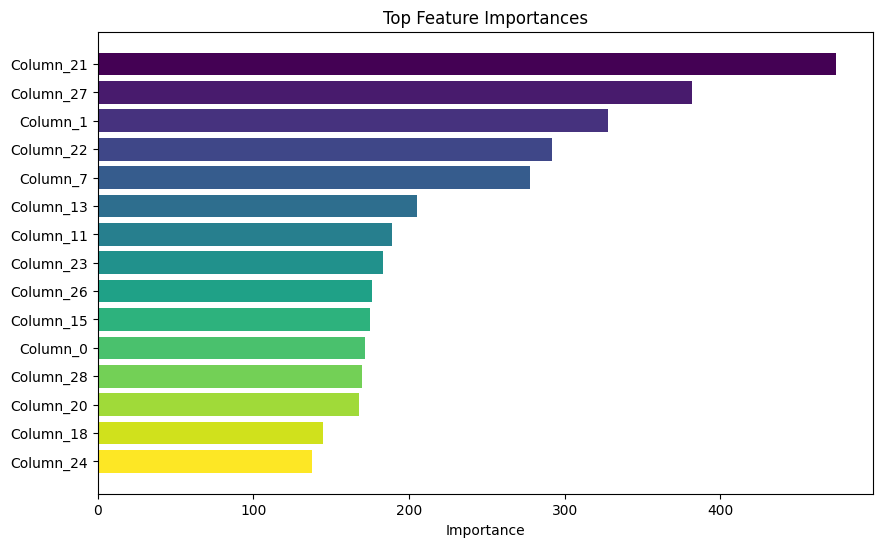

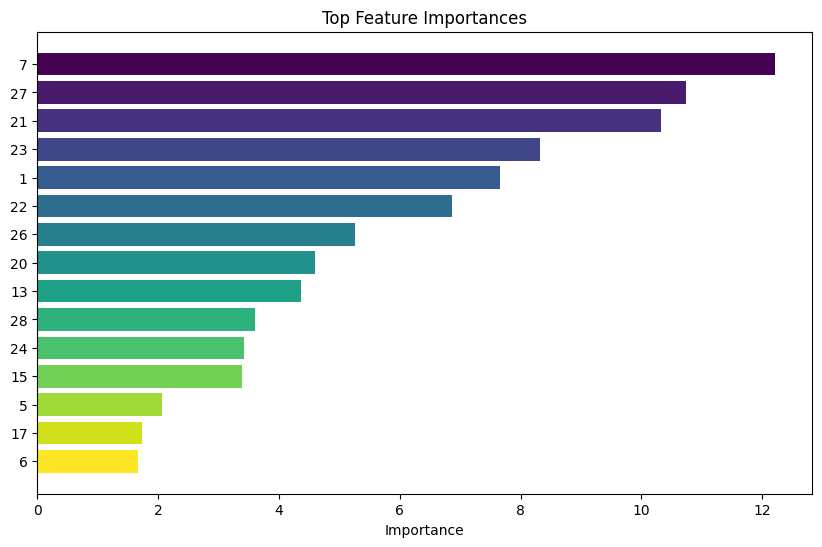

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(importances: dict, top_n: int = 15):
    features = list(importances.keys())[:top_n]
    values = list(importances.values())[:top_n]

    # Couleurs progressives (du rouge vers le bleu)
    colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

    plt.figure(figsize=(10, 6))
    plt.barh(features, values, color=colors)
    plt.gca().invert_yaxis()
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.show()



adapter = BoostingFeatureImportanceAdapter()
fi_xgb = adapter.get_feature_importances(xgb_model)
plot_feature_importances(fi_xgb)  # couleurs automatiques

fi_lgb = adapter.get_feature_importances(lgb_model)
plot_feature_importances(fi_lgb)

fi_cat = adapter.get_feature_importances(cat_model)
plot_feature_importances(fi_cat)